 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [65]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [66]:
# Reading whale returns
whalepath = Path("./whale_returns.csv")
whale_returns = pd.read_csv(whalepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [67]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [68]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [69]:
# Reading algorithmic returns
algopath = Path("./algo_returns.csv")
algo_returns = pd.read_csv(algopath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [70]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [71]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [72]:
# Reading S&P 500 Closing Prices
sp500path = Path("./sp500_history.csv")
sp500_returns= pd.read_csv(sp500path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Must sort data from oldest date to most recent, else the pct_change function will work inveresely.

sp500_returns = sp500_returns.sort_index()
sp500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [73]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [74]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace('$', "")
sp500_returns = sp500_returns.astype('float64')
sp500_returns.dtypes

Close    float64
dtype: object

In [75]:
# Calculate Daily Returns
sp500_returns = sp500_returns.pct_change()

In [76]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [77]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ["SP500"]
sp500_returns

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [78]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns = pd.concat([whale_returns, algo_returns, sp500_returns], join="inner", axis = "columns")
returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

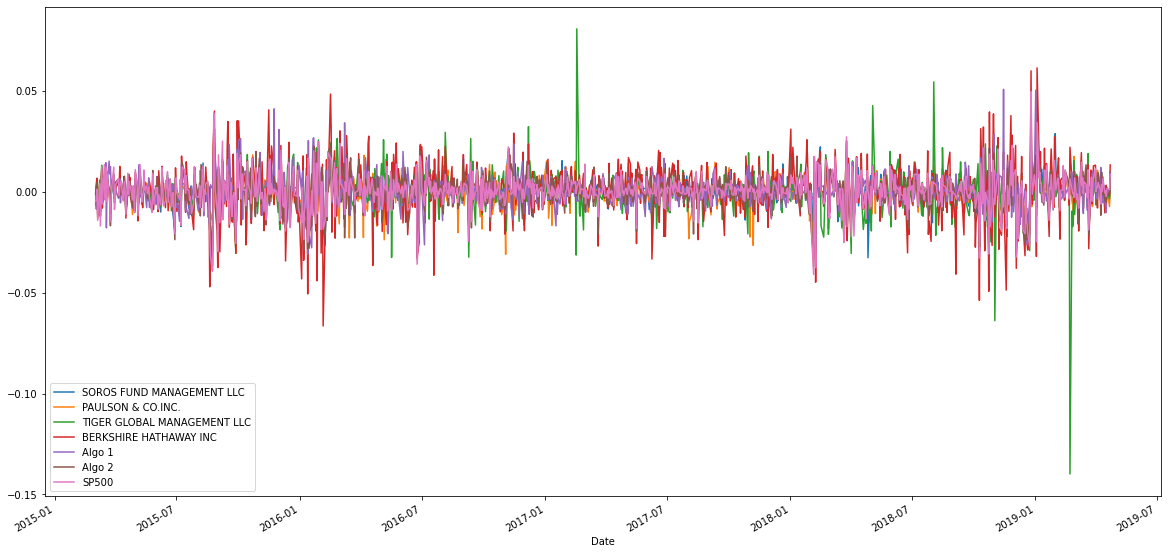

In [79]:
# Plot daily returns of all portfolios
returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

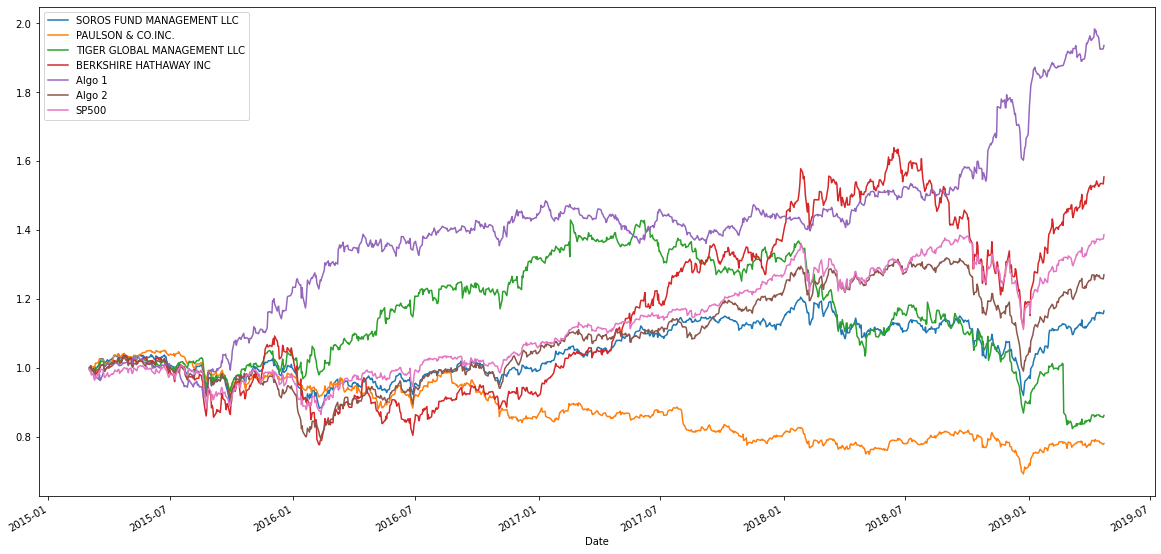

In [80]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (returns + 1).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

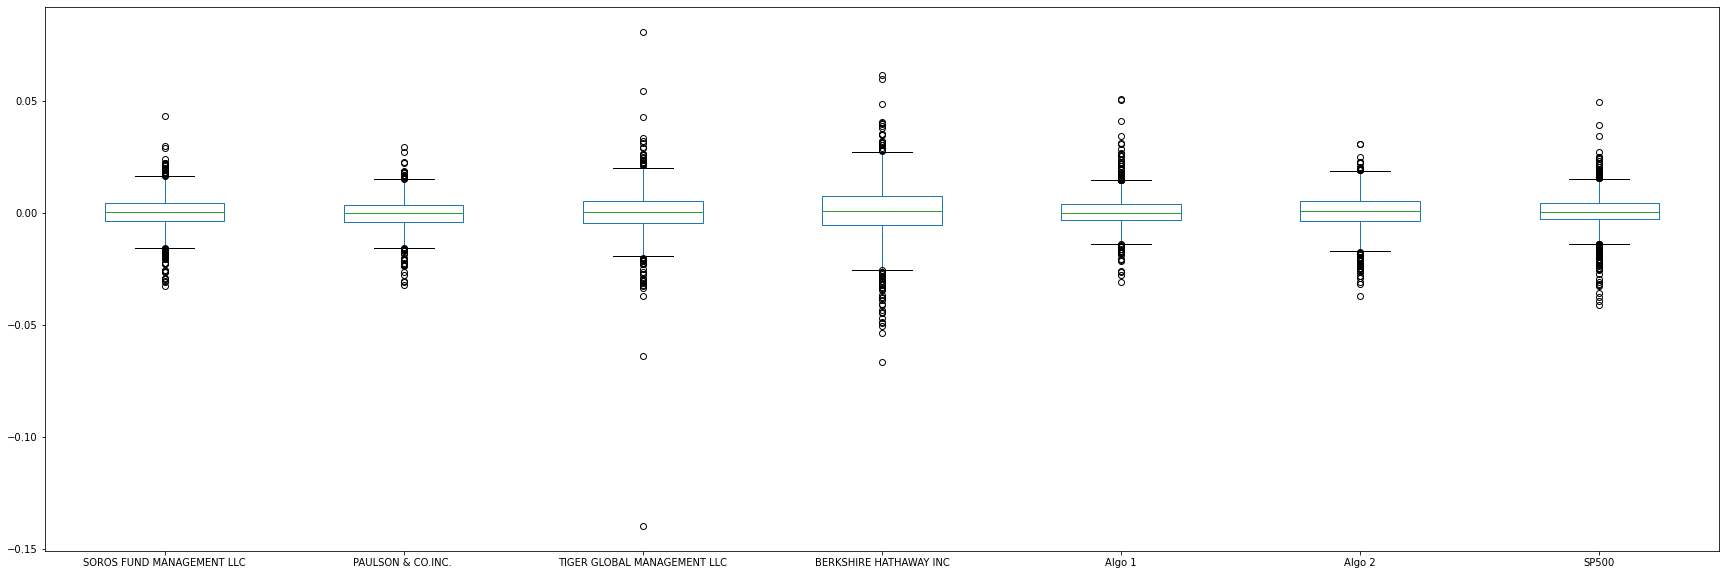

In [81]:
# Box plot to visually show risk
returns.plot.box(figsize=(30,10))

### Calculate Standard Deviations

In [82]:
# Calculate the daily standard deviations of all portfolios
stddevs = returns.std()
stddevs

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [83]:
# Calculate  the daily standard deviation of S&P 500
stddevs["SP500"]
# Determine which portfolios are riskier than the S&P 500. I am using a loop to go through all of the standard deviations and isolate the ones greater than the SP500.
risky_portfolios = []
for x,y in stddevs.items():
    if(y>stddevs["SP500"]):
        risky_portfolios.append(x)
print(f"{risky_portfolios} are more risky than the SP500 based on the daily standard deviations")

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'] are more risky than the SP500 based on the daily standard deviations


### Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Annualized Standard Deviations'}>

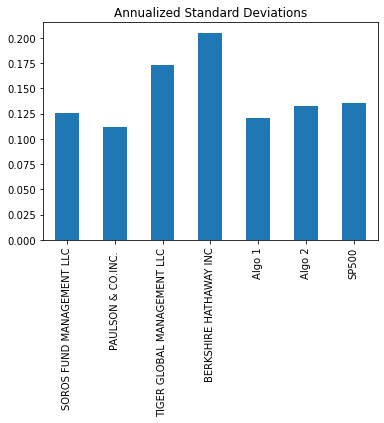

In [84]:
# Calculate the annualized standard deviation (252 trading days)
stddevs_annual = stddevs * np.sqrt(252)
stddevs_annual.plot(kind = "bar", title = "Annualized Standard Deviations")

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

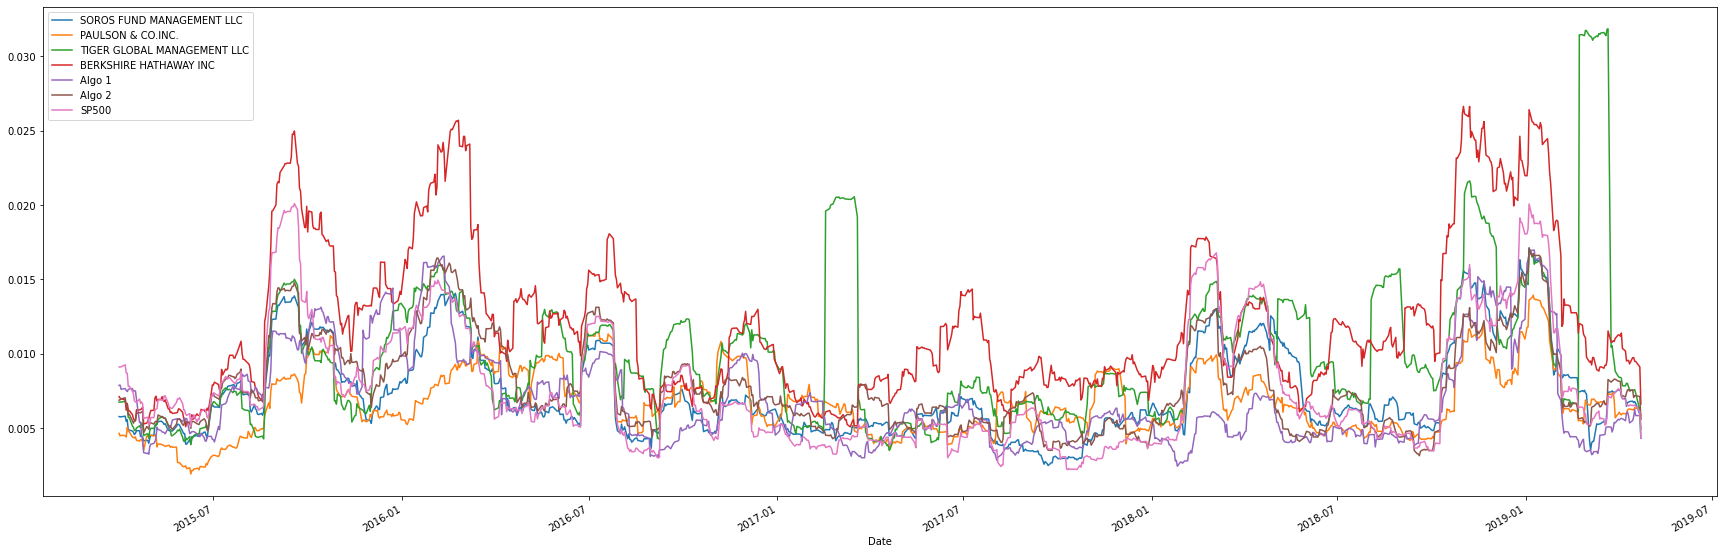

In [85]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_stddevs = returns.rolling(21).std()
rolling_stddevs
# Plot the rolling standard deviation
rolling_stddevs.plot(figsize = (30,10))

### Calculate and plot the correlation

In [86]:
# Calculate the correlation
correlation_matrix = returns.corr()
# Display the correlation matrix
correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

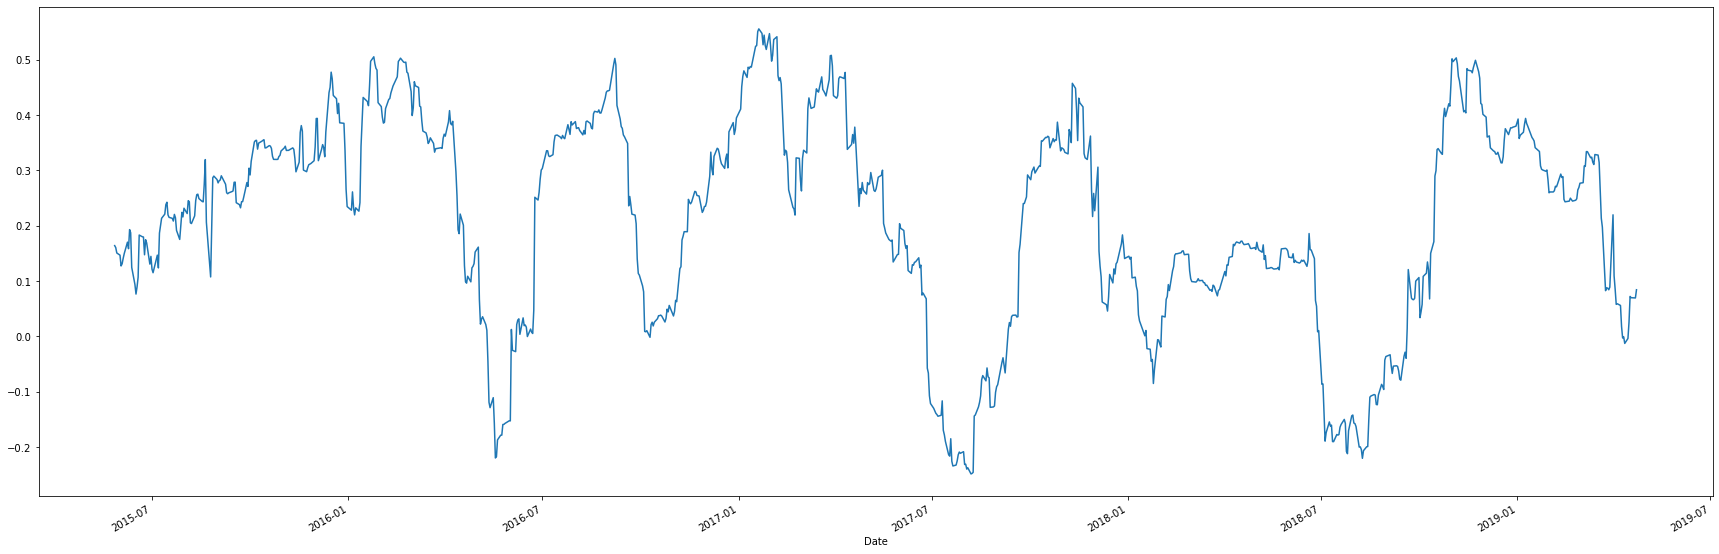

In [87]:
# Calculate covariance of a single portfolio
cov_algo1 = returns["Algo 1"].rolling(60).cov(returns["SP500"])
# Calculate variance of S&P 500
var_sp500 = returns["SP500"].rolling(60).var()
# Computing beta
beta_Algo1 = cov_algo1/var_sp500
# Plot beta trend
beta_Algo1.plot(figsize=(30,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

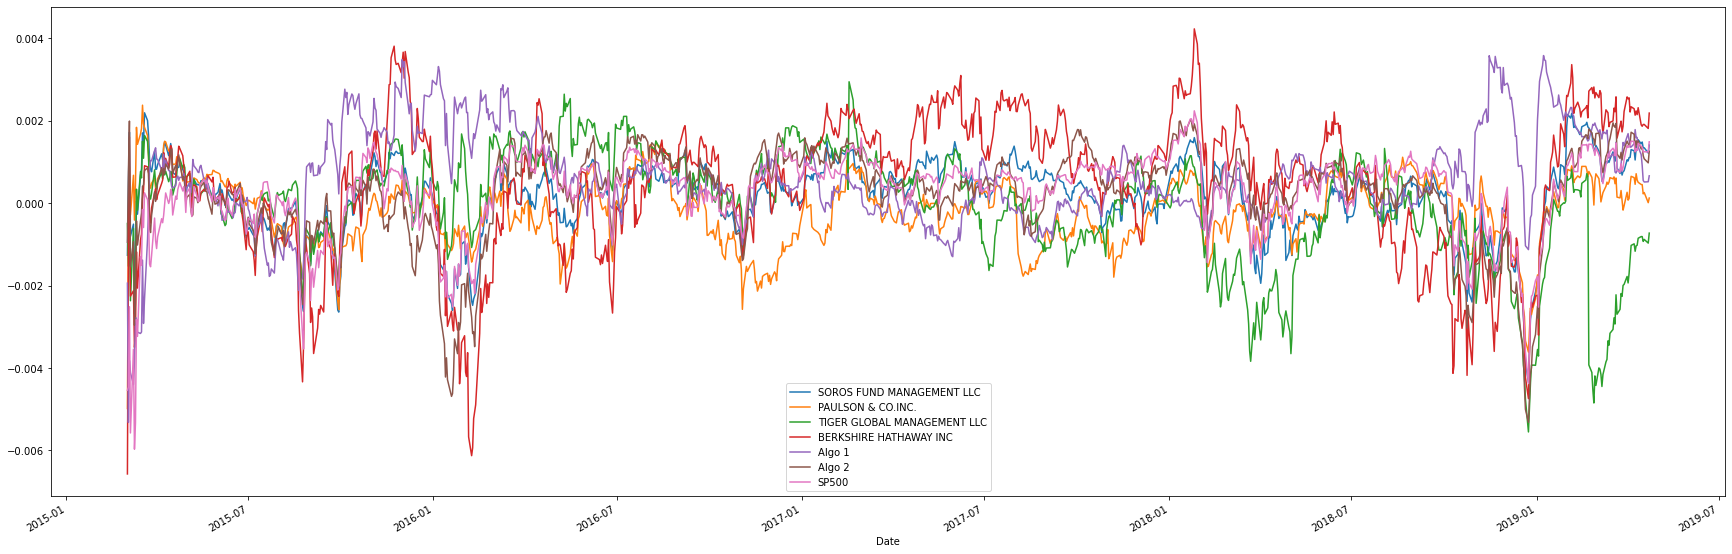

In [88]:
# Use `ewm` to calculate the rolling window
returns.ewm(halflife = 21).mean().plot(figsize=(30,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [89]:
# Annualized Sharpe Ratios. 

#I am not sure that multiplying a daily return average by 252 to estimate a yearly return is very accurate. This method ignores the effects of compounding. But since this is what the professor used in class, I am going to use it here. 
sharpe_ratios_annual = (returns.mean()*252)/stddevs_annual

print(sharpe_ratios_annual.sort_values())

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP500                          0.648267
Algo 1                         1.378648
dtype: float64


<AxesSubplot:>

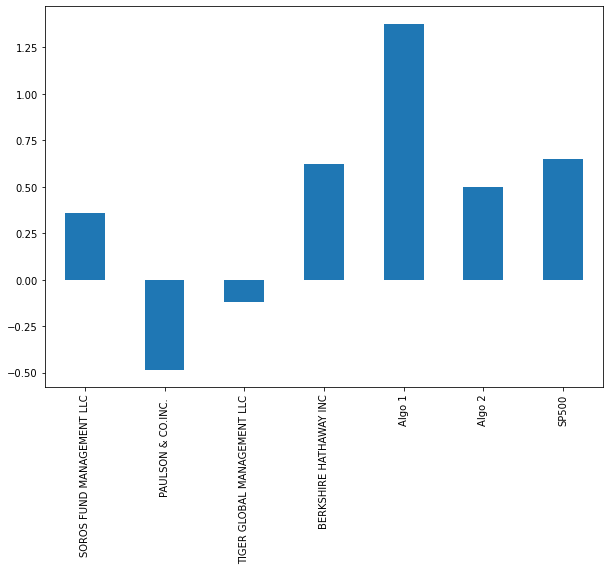

In [90]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_annual.plot(kind="bar", figsize = (10,7))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

From  what I have observed, Algo 1 outperformed the market and the whales, while algo 2 was slightly underperforming against the market, although it did beat most of the whales in terms of sharpe ratio (besides Buffet). 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [91]:
# Reading data from 1st stock
googlepath = Path("./goog_historical.csv")
google = pd.read_csv(googlepath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google = google.drop(columns = ["Symbol"])
google

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [92]:
# Reading data from 2nd stock
applepath = Path("./aapl_historical.csv")
apple = pd.read_csv(applepath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple = apple.drop(columns = ["Symbol"])
apple.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [93]:
# Reading data from 3rd stock
costcopath = Path("./cost_historical.csv")
costco = pd.read_csv(costcopath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco = costco.drop(columns = ["Symbol"])
costco.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [94]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat([google, apple, costco], join = "inner", axis = "columns")
portfolio.columns = ["Google", "Apple", "Costco"]
portfolio.head()

,Google,Apple,Costco
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [95]:
# Reset Date index
portfolio = portfolio.sort_index()
portfolio.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [96]:
# Reorganize portfolio data by having a column per symbol
# Done

In [97]:
# Calculate daily returns
portfolio_returns = portfolio.pct_change()

# Drop NAs
portfolio_returns = portfolio_returns.dropna()
# Display sample data

portfolio_returns

,Google,Apple,Costco
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [98]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
equally_weight_portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
equally_weight_portfolio_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Join your returns DataFrame to the original returns DataFrame
returns["Equally Weighted Portfolio"] = equally_weight_portfolio_returns

<AxesSubplot:title={'center':'Average Daily Returns'}>

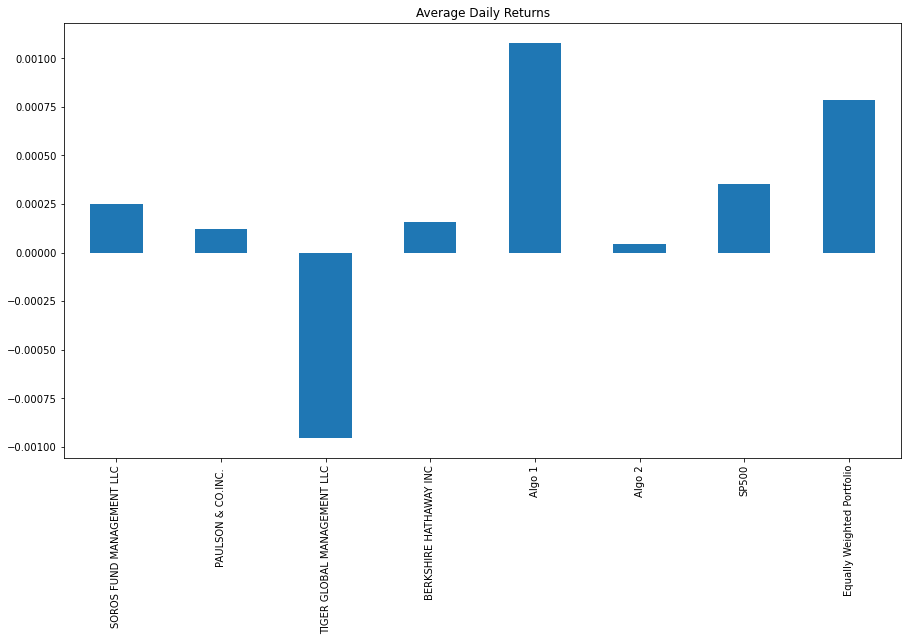

In [100]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns = returns.dropna()
returns.mean().plot(kind="bar", figsize = (15,8), title = "Average Daily Returns")

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation


Our equally weighted portfolio has a standard deviation of: 0.21149550884465995




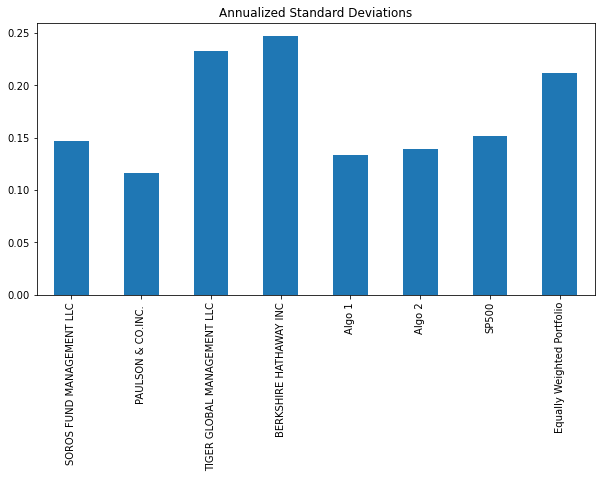

In [101]:
# Calculate the annualized `std`
annual_portfolio_stddevs = returns.std() * np.sqrt(252)
annual_portfolio_stddevs.plot(kind = "bar", figsize=(10,5), title = "Annualized Standard Deviations")
print(f"\nOur equally weighted portfolio has a standard deviation of: {annual_portfolio_stddevs['Equally Weighted Portfolio']}\n\n")

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviations'}, xlabel='Date'>

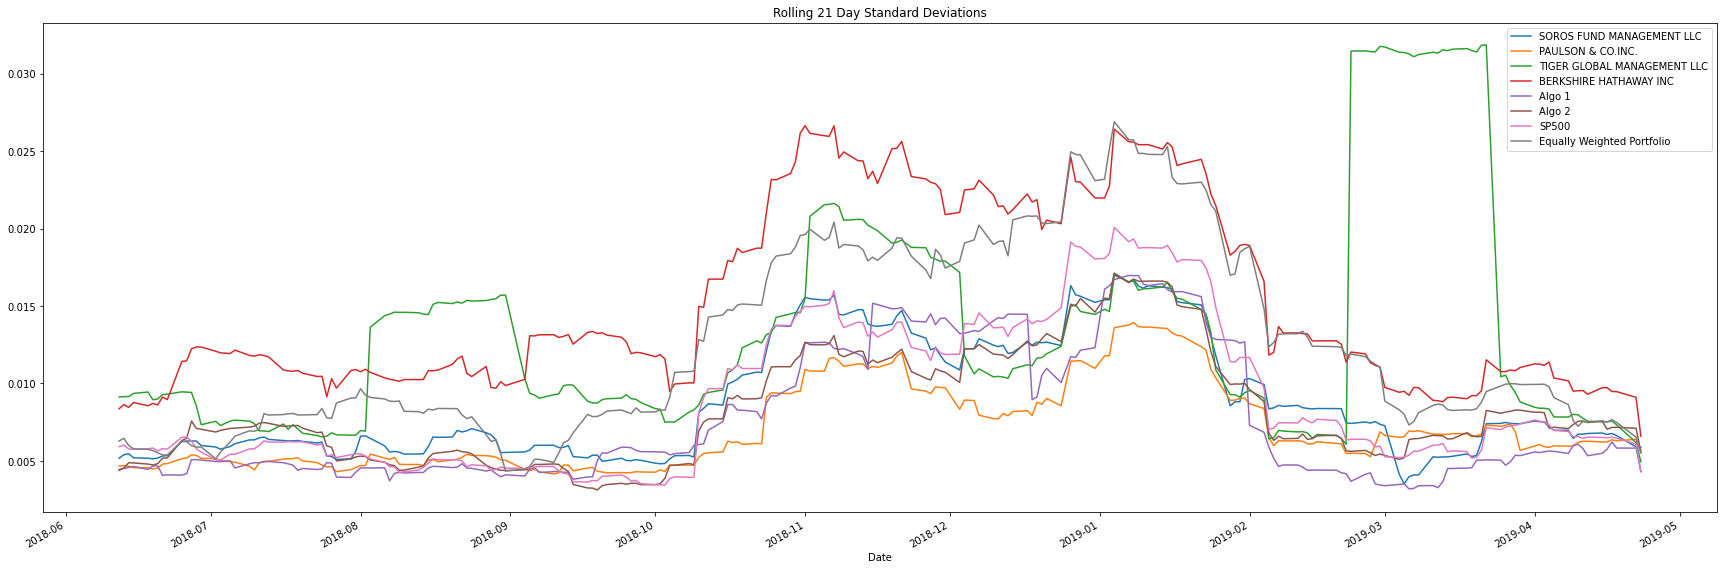

In [102]:
# Calculate rolling standard deviation
rolling_portfolio_stddevs = returns.rolling(21).std()
# Plot rolling standard deviation
rolling_portfolio_stddevs.plot(figsize = (30,10), title = "Rolling 21 Day Standard Deviations")

### Calculate and plot the correlation

<AxesSubplot:>

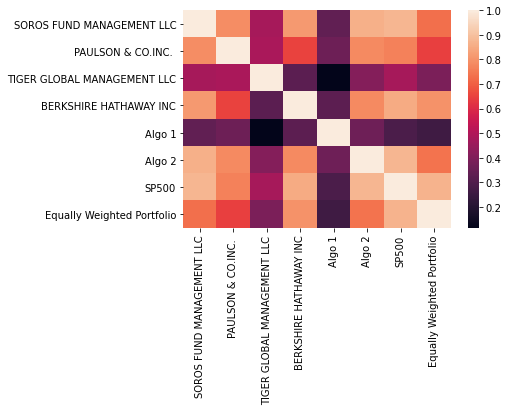

In [103]:
# Calculate and plot the correlation.
sns.heatmap(returns.corr())

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Portfolio 60 Day Rolling Beta (SP500)'}, xlabel='Date'>

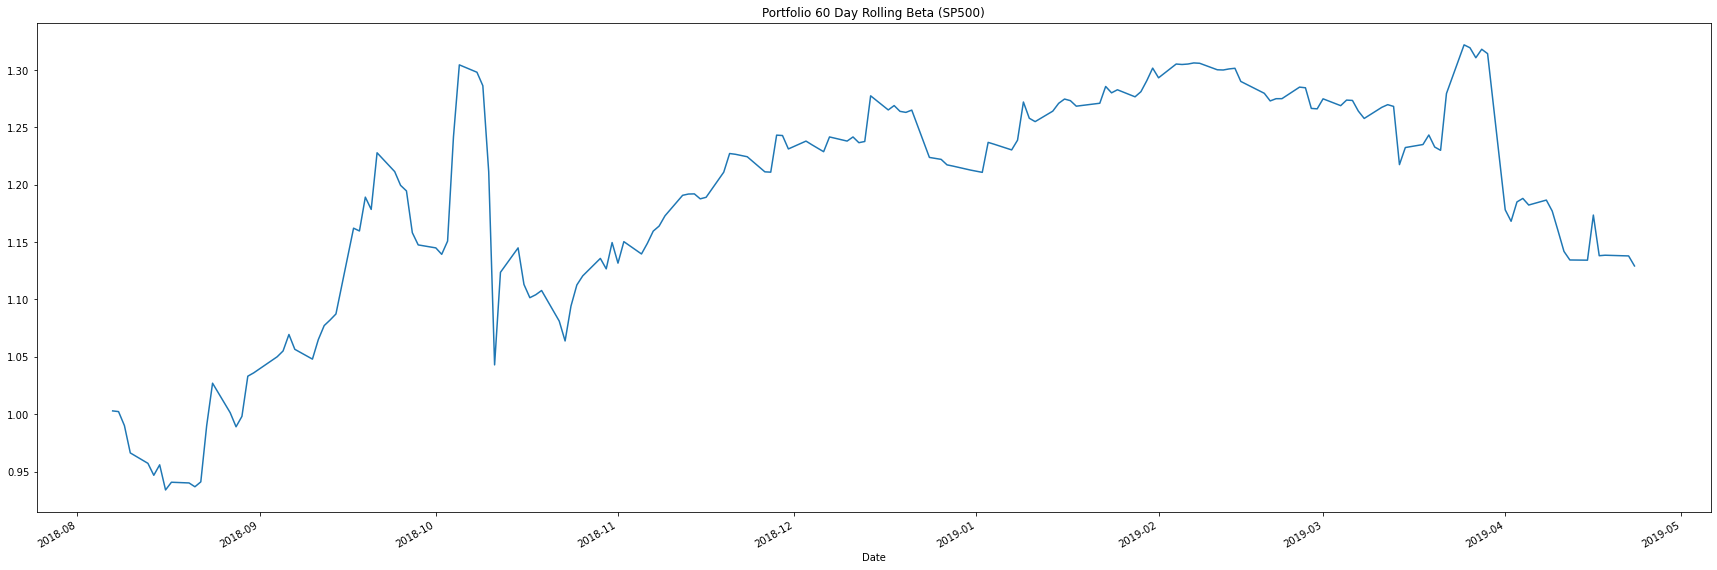

In [104]:
# Calculate and plot Beta
rolling_beta = (returns["Equally Weighted Portfolio"].rolling(60).cov(returns["SP500"]) / returns["SP500"].rolling(60).var())
rolling_beta.plot(figsize = (30,10), title="Portfolio 60 Day Rolling Beta (SP500)")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [105]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = (returns.mean()*252) / (returns.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
Equally Weighted Portfolio     0.933123
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

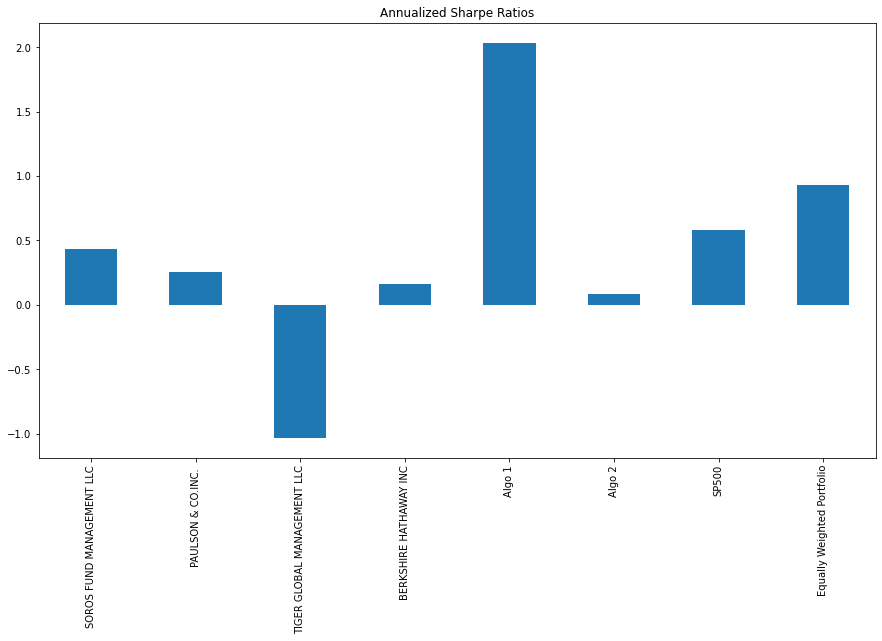

In [108]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", figsize = (15, 8), title="Annualized Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

Once again Algo 1 reigns superior with the highest Sharpe Ratio in this time period. Our equally weighted portfolio comes in second place when measuring using SHarpe Ratio's. This is due to the fact that our Standard Deviation was reletively high, and our average was still lower than Algo 1. Overall, Algorithmic approaches to trading seem to be a viable way to increase returns while managing risk.  